In [60]:
#import modules
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import math

In [61]:
#parse PDB
df = pd.DataFrame(columns=["Bead_no","Bead_name","Residue","Chain_id","Residue_num","x","y","z",
                           "mass","charge","isOverhang"])
Bead_no = []
Bead_name = []
Residue = []
Chain_id = []
Residue_num = []
x = []
y = []
z = []
mass = []
charge = []
with open("CG.pdb") as f:
    for line in f.read().split("\n"):
        if(line.split()[0] == "TER"):
            break
        Bead_no.append(line.split()[1])
        Bead_name.append(line.split()[2])
        Residue.append(line.split()[3])
        Chain_id.append(line.split()[4])
        Residue_num.append(line.split()[5])
        x.append(line.split()[6])
        y.append(line.split()[7])
        z.append(line.split()[8])
        mass.append(line.split()[9])
        charge.append(line.split()[10])
    df["Bead_no"] = Bead_no
    df["Bead_name"] = Bead_name
    df["Residue"] = Residue
    df["Chain_id"] = Chain_id
    df["Residue_num"] = Residue_num
    df["x"] = x
    df["y"] = y
    df["z"] = z
    df["charge"] = charge
    df["mass"] = mass
    df["isOverhang"] = "No"    

In [62]:
#looking at data
df[:3]

,Bead_no,Bead_name,Residue,Chain_id,Residue_num,x,y,z,mass,charge,isOverhang
0,1,BB1,C,E,1,124.113,123.558,118.433,1.00,0.00,No
1,2,BB2,C,E,1,120.928,124.200,117.874,1.00,0.00,No
2,3,BB3,C,E,1,119.186,125.047,116.048,1.00,0.00,No


In [63]:
#some initizlization for plotting
#get the x,y,z coordinates, molecule data
x = np.array([float(item) for item in df['x']])
y = np.array([float(item) for item in df['y']])
z = np.array([float(item) for item in df['z']])
#initialize empty arrays to plot boundary data
bx = []
by = []
bz = []

In [70]:
#get the boundary points
points = []
for i in range(0,len(df['x'])):
    points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
boundary_points = []
for pt in points:
    density_of_point = find_neighbour_density(pt,points)
    print(density_of_point)
    if(density_of_point['count']<30):
        boundary_points.append(pt)

{'Point': [124.113, 123.558, 118.433], 'count': 10}
{'Point': [120.928, 124.2, 117.874], 'count': 19}
{'Point': [119.186, 125.047, 116.048], 'count': 24}
{'Point': [120.667, 127.361, 117.841], 'count': 31}
{'Point': [119.239, 129.045, 117.484], 'count': 37}
{'Point': [121.964, 129.692, 118.017], 'count': 32}
{'Point': [120.974, 123.863, 113.392], 'count': 17}
{'Point': [118.645, 126.176, 112.878], 'count': 26}
{'Point': [118.039, 128.17, 111.231], 'count': 31}
{'Point': [119.533, 129.935, 113.712], 'count': 42}
{'Point': [119.311, 132.229, 113.427], 'count': 46}
{'Point': [121.673, 132.397, 114.696], 'count': 47}
{'Point': [120.918, 129.563, 114.489], 'count': 38}
{'Point': [119.743, 126.931, 108.596], 'count': 23}
{'Point': [118.359, 129.929, 108.316], 'count': 28}
{'Point': [118.696, 132.267, 107.122], 'count': 29}
{'Point': [120.309, 132.831, 110.06], 'count': 46}
{'Point': [121.04, 135.674, 110.432], 'count': 49}
{'Point': [123.007, 133.975, 111.803], 'count': 49}
{'Point': [121.33

In [71]:
boundary_points

[[124.113, 123.558, 118.433],
 [120.928, 124.2, 117.874],
 [119.186, 125.047, 116.048],
 [120.974, 123.863, 113.392],
 [118.645, 126.176, 112.878],
 [119.743, 126.931, 108.596],
 [118.359, 129.929, 108.316],
 [118.696, 132.267, 107.122],
 [120.181, 130.667, 104.432],
 [120.659, 133.897, 104.762],
 [122.381, 135.887, 104.395],
 [123.714, 134.524, 101.559],
 [125.318, 136.942, 103.121],
 [129.172, 137.022, 100.74],
 [131.037, 138.563, 102.988],
 [134.77, 138.427, 100.639],
 [136.994, 138.261, 103.084],
 [139.299, 137.128, 103.728],
 [140.383, 137.122, 100.466],
 [144.383, 132.671, 99.738],
 [145.206, 130.343, 101.869],
 [145.733, 127.753, 102.262],
 [147.358, 127.482, 99.23],
 [146.401, 124.765, 100.75],
 [145.441, 122.281, 100.518],
 [147.228, 121.467, 97.743],
 [144.696, 119.475, 98.576],
 [143.024, 117.811, 97.392],
 [145.37, 117.06, 94.996],
 [142.341, 115.901, 94.454],
 [142.996, 114.052, 90.439],
 [139.945, 114.253, 89.147],
 [138.73, 114.645, 86.823],
 [141.366, 113.255, 85.077],


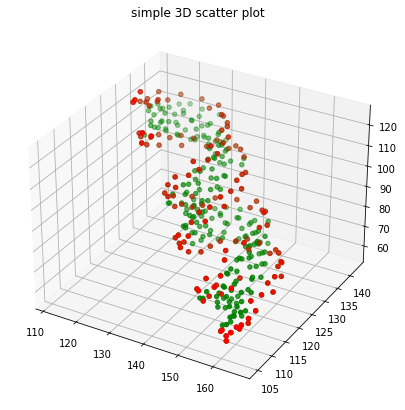

In [72]:
#plot molecule with its boundary points
for i in range(0,len(boundary_points)):
    np.array(bx.append(boundary_points[i][0]))
    np.array(by.append(boundary_points[i][1]))
    np.array(bz.append(boundary_points[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

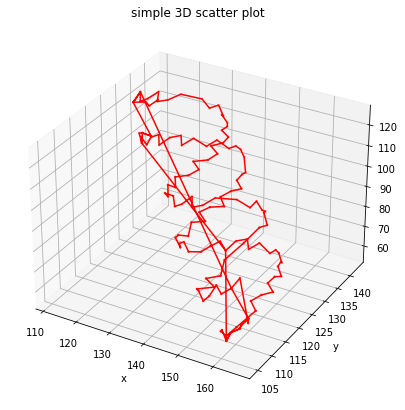

In [73]:
# Just the boundary plot 
fig2 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=2)
plt.title("simple 3D scatter plot")
ax.plot(bx,by,bz,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [81]:
#get spline data
spline = []
bndry_pts = boundary_points[:]
total_points_length = len(bndry_pts)
# for i in range(0,total_points_length):
i = 0
while i<len(bndry_pts):
    neighbours_array = []
    #thee is thy's first neighbour
    neighbours_array.append(bndry_pts[i])
#     print(i)
#     for j,val in enumerate(bndry_pts[i+1:]):
    j = i+1
    while(j<len(bndry_pts)):
        dis = distance(bndry_pts[i],bndry_pts[j])
        if(dis<30):
            neighbours_array.append(bndry_pts[j])
            del bndry_pts[j]
            total_points_length = total_points_length - 1
        j = j+1
#     if(len(centroid_array)>0):
    if(len(neighbours_array)>0):
        #calculate centroid for the neighbours
        centre = centroid(neighbours_array)
#         print(centre)
        spline.append(centroid(neighbours_array))
#         print(spline)
    i = i+1

[[129.07, 130.391, 109.589], [126.395, 130.86, 110.306], [131.705, 129.376, 102.347], [139.167, 127.935, 96.843], [148.218, 121.874, 82.057], [153.097, 118.183, 75.936], [153.974, 116.022, 73.708], [158.351, 112.757, 66.476], [159.297, 111.86, 65.548], [160.53, 109.945, 59.331], [145.248, 128.408, 98.563], [113.477, 138.361, 119.48]]


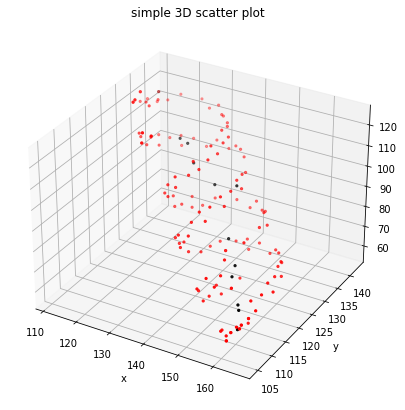

In [84]:
#Plot spine of molecule
#initialize arrays to plot the spine coordinates - centroidal axis
spline_x = []
spline_y = []
spline_z = []

print(spline)
for i in range(0,len(spline)):
    np.array(spline_x.append(spline[i][0]))
    np.array(spline_y.append(spline[i][1]))
    np.array(spline_z.append(spline[i][2]))
fig3 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=5)
ax.scatter3D(spline_x,spline_y,spline_z, color = "black",linestyle='-',s=5)
# ax.plot(spline_x,spline_y,spline_z, color='black')

plt.title("simple 3D scatter plot")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [85]:
spline

[[129.07, 130.391, 109.589],
 [126.395, 130.86, 110.306],
 [131.705, 129.376, 102.347],
 [139.167, 127.935, 96.843],
 [148.218, 121.874, 82.057],
 [153.097, 118.183, 75.936],
 [153.974, 116.022, 73.708],
 [158.351, 112.757, 66.476],
 [159.297, 111.86, 65.548],
 [160.53, 109.945, 59.331],
 [145.248, 128.408, 98.563],
 [113.477, 138.361, 119.48]]

##### ------------------------------------------------ Function definitions --------------------------------------------

In [6]:
def find_neighbour_density(point_A,set_of_points):
    neighbours = []
    for point_B in set_of_points:
        if(point_A != point_B):
            dis = distance(point_A,point_B)
            if(dis < 10):
                neighbours.append(set_of_points[i])
    return {"Point":point_A,"count":len(neighbours)}

In [7]:
def distance(point_A,point_B):
    x1 = float(point_A[0])
    y1 = float(point_A[1])
    z1 = float(point_A[2])
    x2 = float(point_B[0])
    y2 = float(point_B[1])
    z2 = float(point_B[2])
    dis = math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2) )
    return dis

In [8]:
def centroid(points):
    sum_x = 0.0
    sum_y = 0.0
    sum_z = 0.0
    l = float(len(points))
    for point in points:
        sum_x = sum_x + point[0]
        sum_y = sum_y + point[1]
        sum_z = sum_z + point[2]
    return [round(sum_x/l,3),round(sum_y/l,3),round(sum_z/l,3)]

In [9]:
def return_grid_coordinates(df):
    x_max = df['x'][0]
    y_max = df['y'][0]
    z_max = df['z'][0]

    x_min = df['x'][0]
    y_min = df['y'][0]
    z_min = df['z'][0]

    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate > x_max):
            x_max = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate > y_max):
            y_max = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate > z_max):
            z_max = z_coordinate
    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate < x_min):
            x_min = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate < y_min):
            y_min = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate < z_min):
            z_min = z_coordinate
    return ([x_min,x_max,y_min,y_max,z_min,z_max])

In [1]:

# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Create axis
axes = [60, 50, 50]
 
# Create Data
data = np.ones(axes, dtype=np.bool)
 
# Control Transparency
alpha = 0.9
 
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
 
colors[:] = [1, 0, 0, alpha]  # red
 
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)
# ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(x,y,z, color = "blue",s=5)

NameError: name 'x' is not defined

In [459]:
x_cube , y_cube , z_cube = np.indices((100,100,100))
# cube1 = 

In [458]:
x_cube

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2]],

       ...,

       [[97, 97, 97, ..., 97, 97, 97],
        [97, 97, 97, ..., 97, 97, 97],
        [97, 97, 97, ..., 97, 97, 97],
        ...,
        [97, 97, 97, ..., 97, 97, 97],
        [97, 97, 97, ..., 97, 97, 97],
        [97, 97, 97, ..., 97, 97

In [443]:
data

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
  